# Para hoy
- Regresion logistica
- Hiperparametros
- y otras cosillas

LA regresión logistica sirve para clasificar en variables numericas entre 0 y 1 que permite saber en q probabilidad se obtiene la clase
esto usa una ecuación que entregue valores entre 0 y 1 
pero ojo, solo sirve para clasificar!!!

puede ser 
- binaria 2 categorias 
- multinomial más de 2 categorias pero sin orden de las categorias
- ordinal más de 2 categorias poer con orden de las categorias

los hiperparametros que se pueden ajustar son:
El feed intercept -> si queremos un beta 
penalty -> para la regularización de las clases, sirve para saber el peso que tiene una variable o los betas
este puede ser L1 -> beta 0 de una categoria
L2 -> para generar pequeños Betas que evita el overfitting
elasticnet -> sirve para hacer ambas regularizaciones
Tol -> tolerancia de los errores, sirve para parar los algoritmos cuando ya no mejoran en su curva de error, tambien se llama early stoping
C -> reduce el overfitting, entre más pequeño es se reduce, pero hace que el algoritmo sea lento
class_weight-> para balancear clases
solver -> forma de solucion
multi_class -> tipo de regresión (de las 3 que existen)
warm_start-> sirve para reducir el tiempo de entrenamiento
L1_ratio -> q radio se le aplica a nuestro regularizador

Puede ser predict para predecir clases
y predict_proba para mostrar las probabilidades de pertenecer a las clases


Cuando es multiclase ordinal hay dos estrategias para clasificar
OvA one vs all or OvR  multiples clases donde no tengan diferencia entre ellos 
OvO one vs one cuando una clase tenga más importancia sobre la otra

# Ejercicio
el kaggle https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression
el data /Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_7/Data/framingham.csv

KNN
Arboles
Bosques
Regresion logistica
con optimizacion, matriz de confusión y reporte

## Importando librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

In [4]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_7/Data/framingham.csv'
data=pd.read_csv(archivo)

## Primeras impresiones

In [5]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


viendo .info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Se ven presencia de NaN

In [7]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Son bastantes datos, por lo que hay que rellenarlos con el promedio en algunos casos como el BMI y la glucosa

In [8]:
data=data.apply(lambda x: x.fillna(round(x.mean()),axis=0))

In [9]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Viendo si hay duplicados, puede que se borren por la forma de llenado

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 562.9 KB


no habian duplicados

## Algunas visualizaciones

In [12]:
diab=data.groupby('currentSmoker')['diabetes'].sum()
diab

currentSmoker
0    70
1    39
Name: diabetes, dtype: int64

Text(0.5, 1.0, 'Comportamiento de diabetes y fumadores')

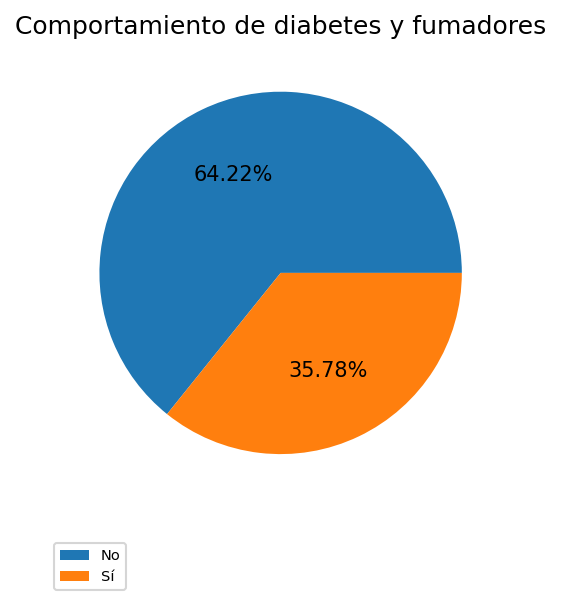

In [13]:
plt.figure(dpi=150)
plt.pie(diab.values,autopct="%.2f%%")
plt.legend(['No','Sí'],loc=[0,-0.2],fontsize=7)
plt.title('Comportamiento de diabetes y fumadores')


<AxesSubplot:xlabel='totChol', ylabel='sysBP'>

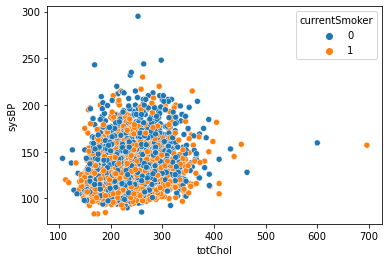

In [14]:
sns.scatterplot(data=data,x='totChol',y='sysBP',hue='currentSmoker')

<AxesSubplot:xlabel='prevalentStroke', ylabel='cigsPerDay'>

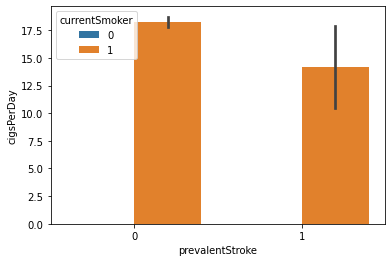

In [15]:
sns.barplot(data=data,x='prevalentStroke',y='cigsPerDay',hue='currentSmoker')


<AxesSubplot:xlabel='BPMeds', ylabel='cigsPerDay'>

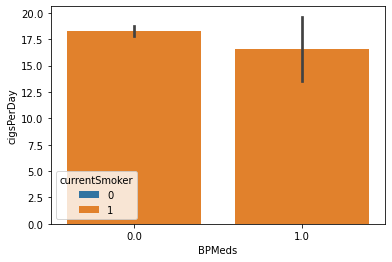

In [16]:
sns.barplot(data=data,x='BPMeds',y='cigsPerDay',hue='currentSmoker', dodge=False )

## los modelos

separando la data

In [17]:
X = data.drop(columns=['TenYearCHD'])
y = data["TenYearCHD"]

In [18]:
y.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [19]:
644/3594

0.1791875347801892

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5,stratify=y_val)

## decision tree

In [21]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)
print('Accuracy', tree_clf.score(X_val, y_val))


Accuracy 0.8474842767295597


In [22]:
param_grid = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}
]

arbol_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(arbol_clf, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [23]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])


[0.84794374 0.84895271 0.84423436 0.84086054 0.82973354 0.82771163
 0.82569029 0.82636369 0.81456385 0.80782019] [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}]


In [24]:
tree_clf = DecisionTreeClassifier(max_depth=1)
tree_clf.fit(X_train, y_train)
print('Accuracy', tree_clf.score(X_val, y_val))


Accuracy 0.8474842767295597


In [25]:
validacion_tree=tree_clf.predict(X_test)


In [26]:
print(classification_report(y_test, validacion_tree))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       540
           1       0.00      0.00      0.00        96

    accuracy                           0.85       636
   macro avg       0.42      0.50      0.46       636
weighted avg       0.72      0.85      0.78       636



/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

matriz de confusion

In [27]:
def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number)
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    ax = plt.gca()

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="k", fontsize=16)

    plt.show()

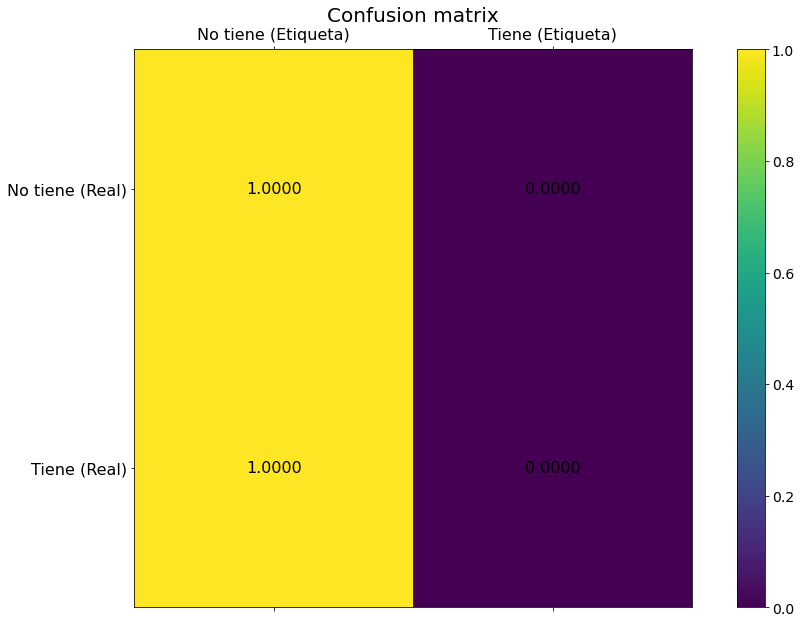

In [28]:
cm = metrics.confusion_matrix(y_test,validacion_tree)
plotCMa(cm,['No tiene','Tiene'])

### RAMDOM FOREST

In [60]:
rndf_clf = RandomForestClassifier(n_estimators=150)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)

rndf_clf.score(X_val, y_val)


0.8411949685534591

In [30]:
param_grid = [{'n_estimators':[10,50,100,150,200,250,300,350,400,450,500]}
]

forest_clf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                           400, 450, 500]}],
             return_train_score=True)

In [31]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])


[0.84153451 0.8455823  0.84592013 0.84558287 0.84693024 0.845919
 0.84895384 0.84760477 0.84524389 0.84861714 0.84726807] [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 150}, {'n_estimators': 200}, {'n_estimators': 250}, {'n_estimators': 300}, {'n_estimators': 350}, {'n_estimators': 400}, {'n_estimators': 450}, {'n_estimators': 500}]


In [32]:
rndf_clf = RandomForestClassifier(n_estimators=150)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)

#print(y_pred)
#print(y_val.tolist())
rndf_clf.score(X_val, y_val)


0.839622641509434

In [33]:
validacion=rndf_clf.predict(X_test)
print(classification_report(y_test, validacion))


              precision    recall  f1-score   support

           0       0.85      0.99      0.92       540
           1       0.56      0.05      0.10        96

    accuracy                           0.85       636
   macro avg       0.71      0.52      0.51       636
weighted avg       0.81      0.85      0.79       636



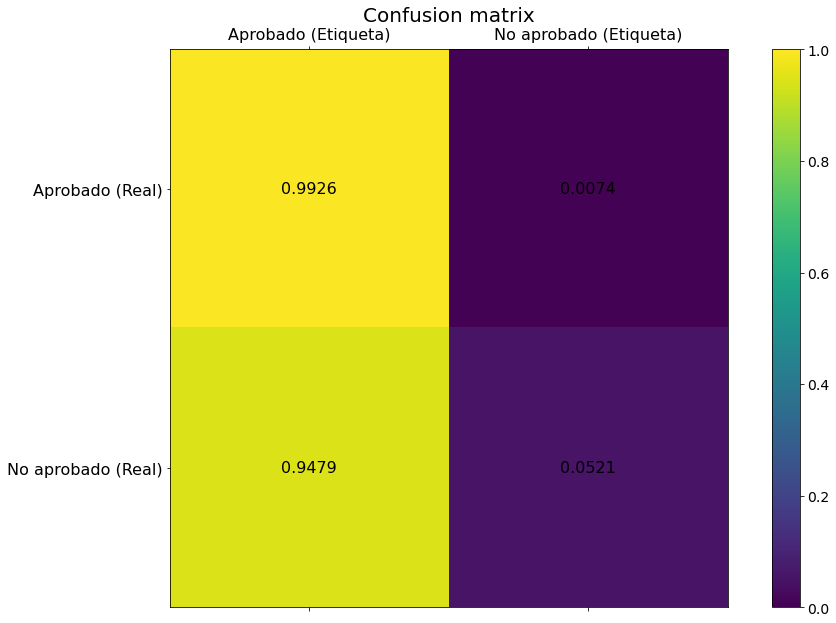

In [34]:
cm = metrics.confusion_matrix(y_test,validacion)
plotCMa(cm,['Aprobado','No aprobado'])

### knn

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)

In [36]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_val)
accuracy=knn.score(X_val, y_val)
print('Accuracy:',accuracy)

Accuracy: 0.7672955974842768


In [37]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [38]:
cvres = grid.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.77814064 0.84152903 0.82029188 0.84322049 0.83580626 0.84794226
 0.84322732 0.84929134 0.84727341 0.84794226 0.84625876 0.8479434
 0.84659773 0.84861452 0.84625535 0.84591978 0.84659318 0.84760329
 0.84659205 0.84760329 0.84827669 0.84895122 0.84928792 0.8492902
 0.84895236 0.84861566 0.84827896 0.8486168  0.84895236 0.8489535 ] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22}, {'n_neighbors': 23}, {'n_neighbors': 24}, {'n_neighbors': 25}, {'n_neighbors': 26}, {'n_neighbors': 27}, {'n_neighbors': 28}, {'n_neighbors': 29}, {'n_neighbors': 30}]


In [39]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_val)
accuracy=knn.score(X_val, y_val)
print('Accuracy:',accuracy)

Accuracy: 0.8443396226415094


In [40]:
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       540
           1       1.00      0.02      0.04        96

    accuracy                           0.85       636
   macro avg       0.93      0.51      0.48       636
weighted avg       0.87      0.85      0.79       636



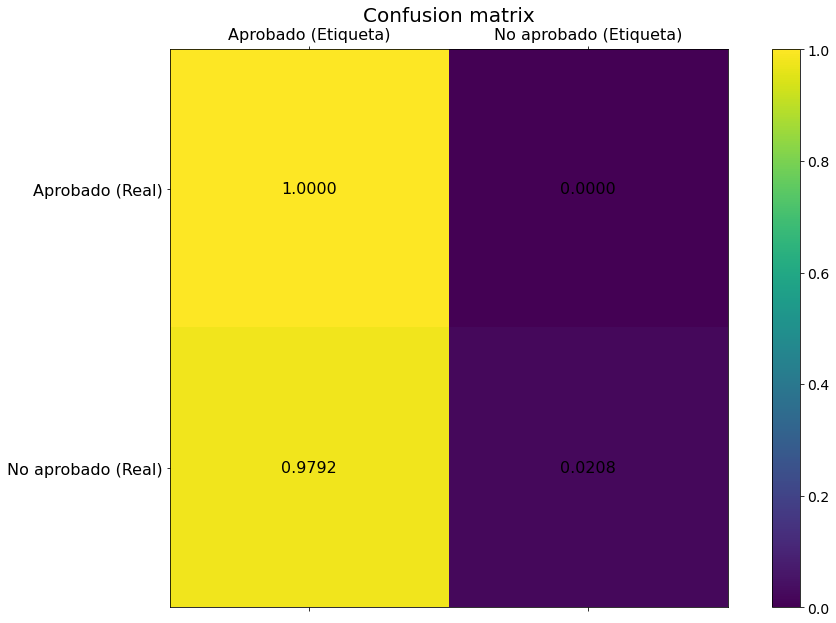

In [41]:
cm = metrics.confusion_matrix(y_test,predictions)
plotCMa(cm,['Aprobado','No aprobado'])

## Regresor logistico

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [43]:
log_reg.score(X_val,y_val)

0.839622641509434

In [44]:
log_reg = LogisticRegression(penalty='none')
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [45]:
log_reg.score(X_val,y_val)

0.839622641509434

In [46]:
predictions_regressor = log_reg.predict(X_test)
print(classification_report(y_test, predictions_regressor))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       540
           1       0.75      0.09      0.17        96

    accuracy                           0.86       636
   macro avg       0.81      0.54      0.54       636
weighted avg       0.84      0.86      0.81       636



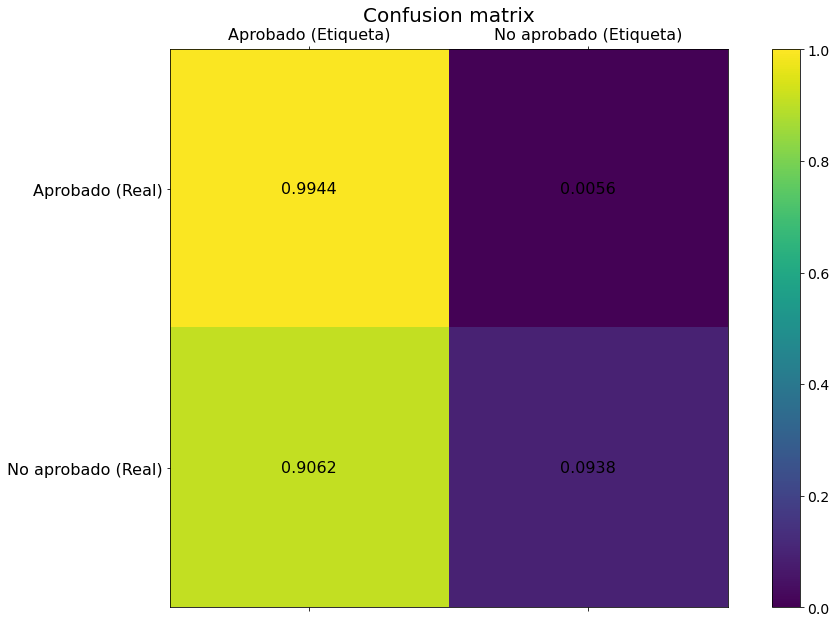

In [47]:
cm = metrics.confusion_matrix(y_test,predictions_regressor)
plotCMa(cm,['Aprobado','No aprobado'])

grid search
c varios valores
class weight
penalty

In [48]:
log_reg = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5)
log_reg.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']

In [52]:
param_grid = [
    {'C':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.025],
    'class_weight':[{0: 0.2, 1: 0.8},{0: 0.17, 1: 0.83},{0: 0.1, 1: 0.9},{0: 0.05, 1: 0.95},{0: 0.01, 1: 0.99},{0: 0.25, 1: 0.75},{0: 0.4, 1: 0.6}],
    'penalty':['none', 'l1', 'l2','elasticnet'],
    'solver':['newton-cg', 'lbfgs', 'liblinear','saga'],
    'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5]}
]

log_reg_clf = LogisticRegression()

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(log_reg_clf, param_grid,cv=2,
                          return_train_score=True,scoring='f1',verbose=1)

grid_search.fit(X_train, y_train)
## ojo, este codigo se demora aprox 4 hrs, dado q toma todo de todo para optimizar, por ende es RECOMENDABLE QUE SE VAYAN CAMBIANDO O QUITANDO PARAMETROS

Fitting 2 folds for each of 8064 candidates, totalling 16128 fits


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv

KeyboardInterrupt: 

ANTES DE HACER ESTE GRIDSEARCH HICIMOS ALGUNOS AJUSTES, DONDE NO LE HABIAMOS AGREGADO:
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']

EL MEJOR CLASS_WEIGHT ES {0: 0.17, 1: 0.83} PQ ES EL PESO DE LA CLASE 1 SOBRE LA CLASE 2

In [53]:
param_grid = [
    {'C':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.025],
    'class_weight':[{0: 0.2, 1: 0.8},{0: 0.17, 1: 0.83},{0: 0.1, 1: 0.9},{0: 0.05, 1: 0.95},{0: 0.01, 1: 0.99},{0: 0.25, 1: 0.75},{0: 0.4, 1: 0.6}],
    'penalty':['elasticnet'],
    'solver':['saga'],
    'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5]}
]

log_reg_clf = LogisticRegression()

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(log_reg_clf, param_grid,cv=2,
                          return_train_score=True,scoring='f1',verbose=1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 504 candidates, totalling 1008 fits


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: C

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1,
                                0.05, 0.025],
                          'class_weight': [{0: 0.2, 1: 0.8}, {0: 0.17, 1: 0.83},
                                           {0: 0.1, 1: 0.9}, {0: 0.05, 1: 0.95},
                                           {0: 0.01, 1: 0.99},
                                           {0: 0.25, 1: 0.75},
                                           {0: 0.4, 1: 0.6}],
                          'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             return_train_score=True, scoring='f1', verbose=1)

In [54]:
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Mejores hiperparametros: {'C': 0.05, 'class_weight': {0: 0.17, 1: 0.83}, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'}


In [55]:
print('Best Score: %s' % grid_search.best_score_)

Best Score: 0.38744972897359675


In [56]:
log_reg = LogisticRegression(C=0.05,penalty='elasticnet',class_weight={0: 0.17, 1: 0.83},solver='saga',l1_ratio=0.4)
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.05, class_weight={0: 0.17, 1: 0.83}, l1_ratio=0.4,
                   penalty='elasticnet', solver='saga')

In [57]:
log_reg.score(X_val,y_val)

0.7358490566037735

In [58]:
predictions_regressor = log_reg.predict(X_test)
print(classification_report(y_test, predictions_regressor))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       540
           1       0.28      0.64      0.39        96

    accuracy                           0.70       636
   macro avg       0.60      0.67      0.60       636
weighted avg       0.82      0.70      0.74       636



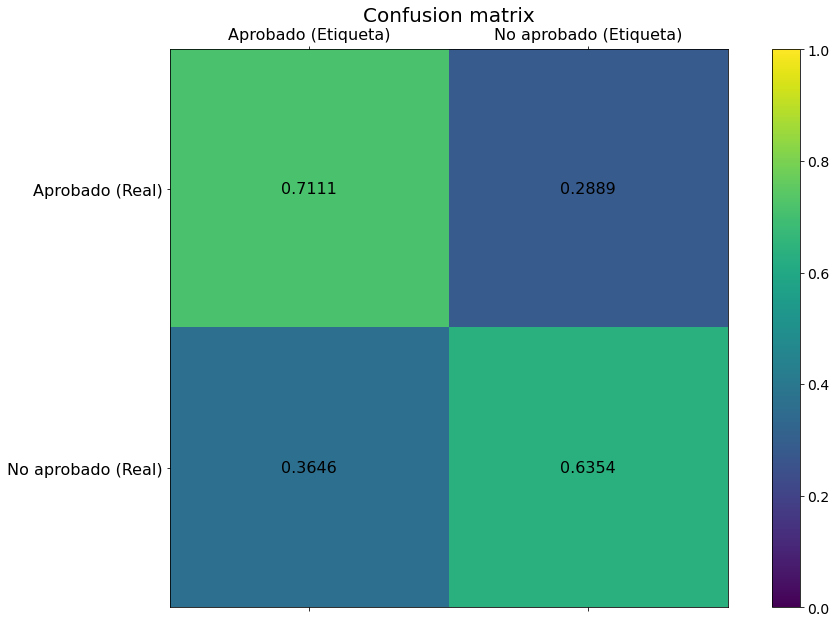

In [59]:
cm = metrics.confusion_matrix(y_test,predictions_regressor)
plotCMa(cm,['Aprobado','No aprobado'])